
# Programa Ejemplo para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [146]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
              'Normal_Nucleoli', 'Mitoses', 'Class']
data.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [147]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(699, 11)

In [148]:
#Cual es el tipo de los atributos?
data.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [149]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


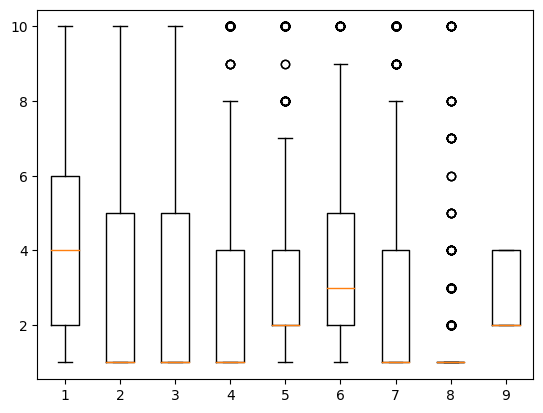

In [150]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Clump_Thickness'],data['Uniformity_of_Cell_Size'],data['Uniformity_of_Cell_Shape'],data['Marginal_Adhesion'],data['Single_Epithelial_Cell_Size'], data['Bland_Chromatin'], data['Normal_Nucleoli'], data['Mitoses'], data['Class']))
plt.show()

In [151]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1182404,1,1,1,1,2,1,2,1,1,2


<ipython-input-152-5007a667ca29>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

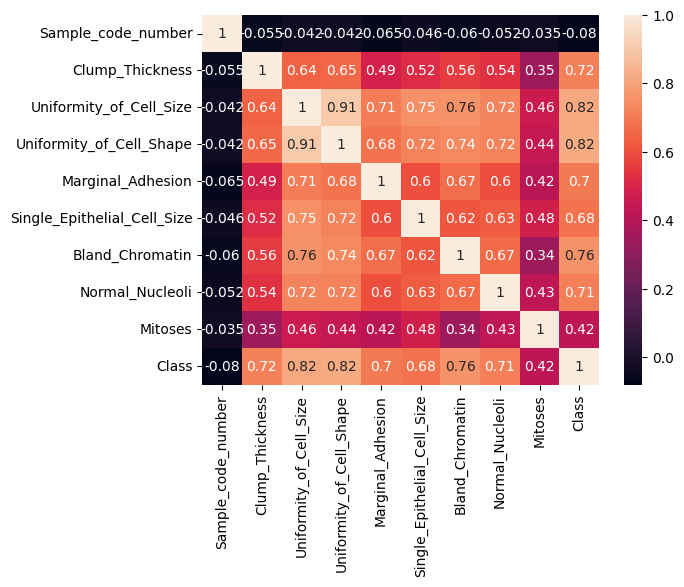

In [152]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

sns.heatmap(data.corr(), annot=True)

In [153]:
#Se elimina la columna Sample_code_number ya que no tiene correlacion con el dato que buscamos (Class), por lo que no es relevante, se considera eliminar Mitoses, pero se decide dejar.
data = data.drop('Sample_code_number',axis=1)
data.corr()

<ipython-input-153-93554b6caedc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [154]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

0

In [155]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()
data.loc[data['Bare_Nuclei'] == '?']

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [156]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Class'].value_counts())

2    458
4    241
Name: Class, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [157]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data.loc[data['Bare_Nuclei'] == '?', 'Bare_Nuclei'] = 1
data.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [158]:
data.isnull().sum()
data.loc[data['Bare_Nuclei'] == '?']

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [159]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype('int64')
data.dtypes

Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [160]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['Marginal_Adhesion'] = preprocessing.scale(data['Marginal_Adhesion'])
data['Single_Epithelial_Cell_Size'] = preprocessing.scale(data['Single_Epithelial_Cell_Size'])
data['Bland_Chromatin'] = preprocessing.scale(data['Bland_Chromatin'])
data['Normal_Nucleoli'] = preprocessing.scale(data['Normal_Nucleoli'])
data['Mitoses'] = preprocessing.scale(data['Mitoses'])
data.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,-0.633247,-0.549561,1,-0.179662,-0.611825,-0.343912,2
1,5,4,4,0.768621,1.710106,10,-0.179662,-0.284112,-0.343912,2
2,3,1,1,-0.633247,-0.549561,2,-0.179662,-0.611825,-0.343912,2
3,6,8,8,-0.633247,-0.097628,4,-0.179662,1.354454,-0.343912,2
4,4,1,1,0.067687,-0.549561,1,-0.179662,-0.611825,-0.343912,2


In [161]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
Class                                                                           
2     0                  4                        1                         1   
      1                  3                        1                         1   
      2                  3                        3                         1   
      3                  5                        1                         1   
      4                  5                        2                         4   
...                    ...                      ...                       ...   
4     236                6                        5                         4   
      237                3                        6                         6   
      238               10                        4                         5   
      239               10                       10                        10   
      240                8                        8                         9   

           Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
Class                                                                    
2     0            -0.633247                    -0.549561            1   
      1            -0.633247                    -0.549561            1   
      2            -0.633247                    -0.549561            1   
      3            -0.282780                    -0.549561            2   
      4            -0.633247                    -1.001495            1   
...                      ...                          ...          ...   
4     236           0.418154                    -0.097628            9   
      237           1.119088                     0.806239           10   
      238           0.768621                     0.806239           10   
      239           2.520955                     0.806239           10   
      240           1.119088                     1.258172            3   

           Bland_Chromatin  Normal_Nucleoli   Mitoses  Class  
Class                                                         
2     0          -0.590067        -0.611825 -0.343912      2  
      1          -0.590067        -0.611825 -0.343912      2  
      2          -1.000471        -0.611825 -0.343912      2  
      3          -0.179662        -0.611825 -0.343912      2  
      4          -1.000471        -0.611825 -0.343912      2  
...                    ...              ...       ...    ...  
4     236         1.461957         1.682167  0.823051      4  
      237         1.051552         1.682167  0.823051      4  
      238         0.230743        -0.611825 -0.343912      4  
      239         2.693171         2.337594  3.156977      4  
      240         2.693171         2.337594 -0.343912      4  

[482 rows x 10 columns]

In [162]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['Class'].value_counts())

2    241
4    241
Name: Class, dtype: int64


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [163]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.40)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(289, 9) (289,)
(193, 9) (193,)


In [164]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

iterations = 100

solvers = ["lbfgs", "liblinear", "newton-cholesky"] #se prueban 3 solvers para ver cual se ajusta mejor a los datos del modelo
solverAccuracy = []
accuracies = []

for i in solvers:
  for j in range(iterations):#se hacen varias iteraciones para obtener un accuracy que mejor describa el modelo
    logisticRegr = LogisticRegression(solver=i, max_iter=500, tol=0.01)
    logisticRegr.fit(X_train, y_train)
    predictions = logisticRegr.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
  solverAccuracy.append(np.mean(accuracies))
#se obtiene el solver con mayor accuracy
elSolver = solvers[np.argmax(solverAccuracy)]

In [165]:
from sklearn.metrics import accuracy_score
# Aplicación del modelo construido a los datos de test
accuracies = []
for i in range(iterations):
  logisticRegr = LogisticRegression(solver=elSolver, max_iter=500, tol=0.01)
  logisticRegr.fit(X_train, y_train)
  predictions = logisticRegr.predict(X_test)
  accuracies.append(accuracy_score(y_test, predictions))
  
np.mean(accuracies)

0.9585492227979274

# Fin del programa